# 第一章 PyTorch基础：Tensor和Autograd

## 1.1 Tensor

Tensor，又名张量，读者可能对这个名词似曾相识，因它不仅在PyTorch中出现过，它也是Theano、TensorFlow、
Torch和MxNet中重要的数据结构。关于张量的本质不乏深度的剖析，但从工程角度来讲，可简单地认为它就是一个数组，且支持高效的科学计算。它可以是一个数（标量）、一维数组（向量）、二维数组（矩阵）和更高维的数组（高阶数据）。Tensor和Numpy的ndarrays类似，但PyTorch的tensor支持GPU加速。

本节将系统讲解tensor的使用，力求面面俱到，但不会涉及每个函数。对于更多函数及其用法，读者可通过在IPython/Notebook中使用函数名加`?`查看帮助文档，或查阅PyTorch官方文档[^1]。

[^1]: http://docs.pytorch.org

In [97]:
# Let's begin
from __future__ import print_function
import torch as t

t.__version__


'2.3.0+cu121'

###  1.1.1 基础操作

学习过Numpy的读者会对本节内容感到非常熟悉，因tensor的接口有意设计成与Numpy类似，以方便用户使用。但不熟悉Numpy也没关系，本节内容并不要求先掌握Numpy。

从接口的角度来讲，对tensor的操作可分为两类：

1. `torch.function`，如`torch.save`等。
2. `tensor.function`，如`tensor.view`等。

为方便使用，对tensor的大部分操作同时支持这两类接口，在本书中不做具体区分，如`torch.sum (torch.sum(a, b))`与`tensor.sum (a.sum(b))`功能等价。

而从存储的角度来讲，对tensor的操作又可分为两类：

1. 不会修改自身的数据，如 `a.add(b)`， 加法的结果会返回一个新的tensor。
2. 会修改自身的数据，如 `a.add_(b)`， 加法的结果仍存储在a中，a被修改了。

函数名以`_`结尾的都是inplace方式, 即会修改调用者自己的数据，在实际应用中需加以区分。

#### 创建Tensor

在PyTorch中新建tensor的方法有很多，具体如表3-1所示。

表1-1: 常见新建tensor的方法

|函数|功能|
|:---:|:---:|
|Tensor(\*sizes)|基础构造函数|
|tensor(data,)|类似np.array的构造函数|
|ones(\*sizes)|全1Tensor|
|zeros(\*sizes)|全0Tensor|
|eye(\*sizes)|对角线为1，其他为0|
|arange(s,e,step)|从s到e，步长为step|
|linspace(s,e,steps)|从s到e，均匀切分成steps份|
|rand/randn(\*sizes)|均匀/标准分布|
|normal(mean,std)/uniform(from,to)|正态分布/均匀分布|
|randperm(m)|随机排列|

这些创建方法都可以在创建的时候指定数据类型dtype和存放device(cpu/gpu).


其中使用`Tensor`函数新建tensor是最复杂多变的方式，它既可以接收一个list，并根据list的数据新建tensor，也能根据指定的形状新建tensor，还能传入其他的tensor，下面举几个例子。

In [98]:
# 指定tensor的形状
a = t.Tensor(2, 3)
a  # 数值取决于内存空间的状态，print时候可能overflow


tensor([[-6.3175e+03,  4.5674e-41,  2.0071e-34],
        [ 0.0000e+00,  4.4842e-44,  0.0000e+00]])

In [99]:
# 用list的数据创建tensor
b = t.Tensor([[1, 2, 3], [4, 5, 6]])
b


tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [100]:
b.tolist()  # 把tensor转为list


[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]

`tensor.size()`返回`torch.Size`对象，它是tuple的子类，但其使用方式与tuple略有区别

In [101]:
b_size = b.size()
b_size


torch.Size([2, 3])

In [102]:
b.numel()  # b中元素总个数，2*3，等价于b.nelement()


6

In [103]:
# 创建一个和b形状一样的tensor
c = t.Tensor(b_size)
# 创建一个元素为2和3的tensor
d = t.Tensor((2, 3))
c, d


(tensor([[1.9833e-34, 0.0000e+00, 2.0377e-34],
         [0.0000e+00, 8.9683e-44, 0.0000e+00]]),
 tensor([2., 3.]))

除了`tensor.size()`，还可以利用`tensor.shape`直接查看tensor的形状，`tensor.shape`等价于`tensor.size()`

In [104]:
c.shape


torch.Size([2, 3])

需要注意的是，`t.Tensor(*sizes)`创建tensor时，系统不会马上分配空间，只是会计算剩余的内存是否足够使用，使用到tensor时才会分配，而其它操作都是在创建完tensor之后马上进行空间分配。其它常用的创建tensor的方法举例如下。

In [105]:
t.ones(2, 3)


tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [106]:
t.zeros(2, 3)


tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [107]:
t.arange(1, 6, 2)


tensor([1, 3, 5])

In [108]:
t.linspace(1, 10, 3)


tensor([ 1.0000,  5.5000, 10.0000])

In [109]:
t.randn(2, 3, device=t.device("cpu"))


tensor([[ 2.2217, -0.1433,  0.4928],
        [-1.1504, -0.1515,  1.1666]])

In [110]:
t.randperm(5)  # 长度为5的随机排列


tensor([1, 2, 3, 0, 4])

In [111]:
t.eye(2, 3, dtype=t.int)  # 对角线为1, 不要求行列数一致


tensor([[1, 0, 0],
        [0, 1, 0]], dtype=torch.int32)

`torch.tensor`是在0.4版本新增加的一个新版本的创建tensor方法，使用的方法，和参数几乎和`np.array`完全一致

In [112]:
scalar = t.tensor(3.14159)
print("scalar: %s, shape of sclar: %s" % (scalar, scalar.shape))


scalar: tensor(3.1416), shape of sclar: torch.Size([])


In [113]:
vector = t.tensor([1, 2])
print("vector: %s, shape of vector: %s" % (vector, vector.shape))


vector: tensor([1, 2]), shape of vector: torch.Size([2])


In [114]:
tensor = t.Tensor(1, 2)  # 注意和t.tensor([1, 2])的区别
tensor.shape


torch.Size([1, 2])

In [115]:
matrix = t.tensor([[0.1, 1.2], [2.2, 3.1], [4.9, 5.2]])
matrix, matrix.shape


(tensor([[0.1000, 1.2000],
         [2.2000, 3.1000],
         [4.9000, 5.2000]]),
 torch.Size([3, 2]))

In [116]:
t.tensor([[0.11111, 0.222222, 0.3333333]], dtype=t.float64, device=t.device("cpu"))


tensor([[0.1111, 0.2222, 0.3333]], dtype=torch.float64)

In [117]:
empty_tensor = t.tensor([])
empty_tensor.shape


torch.Size([0])

#### 常用Tensor操作

通过`tensor.view`方法可以调整tensor的形状，但必须保证调整前后元素总数一致。`view`不会修改自身的数据，返回的新tensor与源tensor共享内存，也即更改其中的一个，另外一个也会跟着改变。在实际应用中可能经常需要添加或减少某一维度，这时候`squeeze`和`unsqueeze`两个函数就派上用场了。

In [118]:
a = t.arange(0, 6)
a.view(2, 3)


tensor([[0, 1, 2],
        [3, 4, 5]])

In [119]:
b = a.view(-1, 3)  # 当某一维为-1的时候，会自动计算它的大小
b.shape


torch.Size([2, 3])

In [120]:
b.unsqueeze(1)  # 注意形状，在第1维（下标从0开始）上增加“１”
# 等价于 b[:,None]
b[:, None].shape


torch.Size([2, 1, 3])

In [121]:
b.unsqueeze(-2)  # -2表示倒数第二个维度


tensor([[[0, 1, 2]],

        [[3, 4, 5]]])

In [122]:
c = b.view(1, 1, 1, 2, 3)
c.squeeze(0)  # 压缩第0维的“１”


tensor([[[[0, 1, 2],
          [3, 4, 5]]]])

In [123]:
c.squeeze()  # 把所有维度为“1”的压缩


tensor([[0, 1, 2],
        [3, 4, 5]])

In [124]:
a[1] = 100
b  # a修改，b作为view之后的，也会跟着修改


tensor([[  0, 100,   2],
        [  3,   4,   5]])

`resize`是另一种可用来调整`size`的方法，但与`view`不同，它可以修改tensor的大小。如果新大小超过了原大小，会自动分配新的内存空间，而如果新大小小于原大小，则之前的数据依旧会被保存，看一个例子。

In [125]:
b.resize_(1, 3)
b


tensor([[  0, 100,   2]])

In [126]:
b.resize_(3, 3)  # 旧的数据依旧保存着，多出的大小会分配新空间
b


tensor([[                  0,                 100,                   2],
        [                  3,                   4,                   5],
        [3761681309000480301, 3270801228861093430, 4050202140167714148]])

#### 索引操作

Tensor支持与numpy.ndarray类似的索引操作，语法上也类似，下面通过一些例子，讲解常用的索引操作。如无特殊说明，索引出来的结果与原tensor共享内存，也即修改一个，另一个会跟着修改。

In [127]:
a = t.randn(3, 4)
a


tensor([[ 0.7509, -0.2519, -1.0005,  0.0845],
        [ 0.7921,  1.2696, -0.4029,  0.0465],
        [-0.4869,  0.8106,  0.3142, -1.5637]])

In [128]:
a[0]  # 第0行(下标从0开始)


tensor([ 0.7509, -0.2519, -1.0005,  0.0845])

In [129]:
a[:, 0]  # 第0列


tensor([ 0.7509,  0.7921, -0.4869])

In [130]:
a[0][2]  # 第0行第2个元素，等价于a[0, 2]


tensor(-1.0005)

In [131]:
a[0, -1]  # 第0行最后一个元素


tensor(0.0845)

In [132]:
a[:2]  # 前两行


tensor([[ 0.7509, -0.2519, -1.0005,  0.0845],
        [ 0.7921,  1.2696, -0.4029,  0.0465]])

In [133]:
a[:2, 0:2]  # 前两行，第0,1列


tensor([[ 0.7509, -0.2519],
        [ 0.7921,  1.2696]])

In [134]:
print(a[0:1, :2])  # 第0行，前两列
print(a[0, :2])  # 注意两者的区别：形状不同


tensor([[ 0.7509, -0.2519]])
tensor([ 0.7509, -0.2519])


In [135]:
# None类似于np.newaxis, 为a新增了一个轴
# 等价于a.view(1, a.shape[0], a.shape[1])
a[None].shape


torch.Size([1, 3, 4])

In [136]:
a[None].shape  # 等价于a[None,:,:]


torch.Size([1, 3, 4])

In [137]:
a[:, None, :].shape


torch.Size([3, 1, 4])

In [138]:
a[:, None, :, None, None].shape


torch.Size([3, 1, 4, 1, 1])

In [139]:
a  # 查看a


tensor([[ 0.7509, -0.2519, -1.0005,  0.0845],
        [ 0.7921,  1.2696, -0.4029,  0.0465],
        [-0.4869,  0.8106,  0.3142, -1.5637]])

In [140]:
a > 1  # 返回一个ByteTensor


tensor([[False, False, False, False],
        [False,  True, False, False],
        [False, False, False, False]])

In [141]:
a[a > 1]  # 等价于a.masked_select(a>1)
# 选择结果与原tensor不共享内存空间

a > 1  # 获取位置
a[a > 1]  # 获取位置中的元素


tensor([1.2696])

In [142]:
#  在PyTorch中，torch.LongTensor是一种张量数据结构，它用来存储整数类型的数据，具体是64位的整数（即long类型）。这种张量通常用于存储索引、整数标签或其他需要整数表示的数据。
t.LongTensor([0, 1])


tensor([0, 1])

In [143]:
a[t.LongTensor([0, 1])]  # 第0行和第1行


tensor([[ 0.7509, -0.2519, -1.0005,  0.0845],
        [ 0.7921,  1.2696, -0.4029,  0.0465]])

其它常用的选择函数如表1-2所示。

表1-2常用的选择函数

函数|功能|
:---:|:---:|
index_select(input, dim, index)|在指定维度dim上选取，比如选取某些行、某些列
masked_select(input, mask)|例子如上，a[a>0]，使用ByteTensor进行选取
non_zero(input)|非0元素的下标
gather(input, dim, index)|根据index，在dim维度上选取数据，输出的size与index一样


`gather`是一个比较复杂的操作，对一个2维tensor，输出的每个元素如下：

```python
out[i][j] = input[index[i][j]][j]  # dim=0， 行
out[i][j] = input[i][index[i][j]]  # dim=1， 列
```
三维tensor的`gather`操作同理，下面举几个例子。

In [144]:
a = t.arange(0, 16).view(4, 4)
a


tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [145]:
# 选取对角线的元素
index = t.LongTensor([[0, 1, 2, 3]])
a.gather(0, index)


tensor([[ 0,  5, 10, 15]])

In [146]:
# 选取反对角线上的元素
index = t.LongTensor([[3, 2, 1, 0]]).t()
a.gather(1, index)


tensor([[ 3],
        [ 6],
        [ 9],
        [12]])

In [147]:
# 选取反对角线上的元素，注意与上面的不同
index = t.LongTensor([[3, 2, 1, 0]])
a.gather(0, index)


tensor([[12,  9,  6,  3]])

In [148]:
# 选取两个对角线上的元素
index = t.LongTensor([[0, 1, 2, 3], [3, 2, 1, 0]]).t()
b = a.gather(1, index)
b


tensor([[ 0,  3],
        [ 5,  6],
        [10,  9],
        [15, 12]])

与`gather`相对应的逆操作是`scatter_`，`gather`把数据从input中按index取出，而`scatter_`是把取出的数据再放回去。注意`scatter_`函数是inplace操作。

```python
out = input.gather(dim, index)
-->近似逆操作
out = Tensor()
out.scatter_(dim, index)
```

In [149]:
# 把两个对角线元素放回去到指定位置
c = t.zeros(4, 4)
c.scatter_(1, index, b.float())


tensor([[ 0.,  0.,  0.,  3.],
        [ 0.,  5.,  6.,  0.],
        [ 0.,  9., 10.,  0.],
        [12.,  0.,  0., 15.]])

对tensor的任何索引操作仍是一个tensor，想要获取标准的python对象数值，需要调用`tensor.item()`, 这个方法只对包含一个元素的tensor适用

In [150]:
a[0, 0]  # 依旧是tensor）


tensor(0)

In [151]:
a[0, 0].item()  # python float


0

In [152]:
d = a[0:1, 0:1, None]
print(d.shape)
d.item()  # 只包含一个元素的tensor即可调用tensor.item,与形状无关


torch.Size([1, 1, 1])


0

In [153]:
# a[0].item()  ->
# raise ValueError: only one element tensors can be converted to Python scalars


#### 高级索引
PyTorch在0.2版本中完善了索引操作，目前已经支持绝大多数numpy的高级索引[^10]。高级索引可以看成是普通索引操作的扩展，但是高级索引操作的结果一般不和原始的Tensor共享内存。 
[^10]: https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#advanced-indexing

In [154]:
x = t.arange(0, 27).view(3, 3, 3)
x


tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

In [155]:
x[[1, 2], [1, 2], [2, 0]]  # x[1,1,2]和x[2,2,0]


tensor([14, 24])

In [156]:
x[[2, 1, 0], [0], [1]]  # x[2,0,1],x[1,0,1],x[0,0,1]


tensor([19, 10,  1])

In [157]:
x[[0, 2], ...]  # x[0] 和 x[2]


tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

#### Tensor类型

Tensor有不同的数据类型，如表3-3所示，每种类型分别对应有CPU和GPU版本(HalfTensor除外)。默认的tensor是FloatTensor，可通过`t.set_default_tensor_type` 来修改默认tensor类型(如果默认类型为GPU tensor，则所有操作都将在GPU上进行)。Tensor的类型对分析内存占用很有帮助。例如对于一个size为(1000, 1000, 1000)的FloatTensor，它有`1000*1000*1000=10^9`个元素，每个元素占32bit/8 = 4Byte内存，所以共占大约4GB内存/显存。HalfTensor是专门为GPU版本设计的，同样的元素个数，显存占用只有FloatTensor的一半，所以可以极大缓解GPU显存不足的问题，但由于HalfTensor所能表示的数值大小和精度有限[^2]，所以可能出现溢出等问题。

[^2]: https://stackoverflow.com/questions/872544/what-range-of-numbers-can-be-represented-in-a-16-32-and-64-bit-ieee-754-syste

表3-3: tensor数据类型

| Data type                | dtype                             | CPU tensor                                                   | GPU tensor                |
| ------------------------ | --------------------------------- | ------------------------------------------------------------ | ------------------------- |
| 32-bit floating point    | `torch.float32` or `torch.float`  | `torch.FloatTensor`                                          | `torch.cuda.FloatTensor`  |
| 64-bit floating point    | `torch.float64` or `torch.double` | `torch.DoubleTensor`                                         | `torch.cuda.DoubleTensor` |
| 16-bit floating point    | `torch.float16` or `torch.half`   | `torch.HalfTensor`                                           | `torch.cuda.HalfTensor`   |
| 8-bit integer (unsigned) | `torch.uint8`                     | [`torch.ByteTensor`](https://pytorch.org/docs/stable/tensors.html#torch.ByteTensor) | `torch.cuda.ByteTensor`   |
| 8-bit integer (signed)   | `torch.int8`                      | `torch.CharTensor`                                           | `torch.cuda.CharTensor`   |
| 16-bit integer (signed)  | `torch.int16` or `torch.short`    | `torch.ShortTensor`                                          | `torch.cuda.ShortTensor`  |
| 32-bit integer (signed)  | `torch.int32` or `torch.int`      | `torch.IntTensor`                                            | `torch.cuda.IntTensor`    |
| 64-bit integer (signed)  | `torch.int64` or `torch.long`     | `torch.LongTensor`                                           | `torch.cuda.LongTensor`   |

 

各数据类型之间可以互相转换，`type(new_type)`是通用的做法，同时还有`float`、`long`、`half`等快捷方法。CPU tensor与GPU tensor之间的互相转换通过`tensor.cuda`和`tensor.cpu`方法实现，此外还可以使用`tensor.to(device)`。Tensor还有一个`new`方法，用法与`t.Tensor`一样，会调用该tensor对应类型的构造函数，生成与当前tensor类型一致的tensor。`torch.*_like(tensora)` 可以生成和`tensora`拥有同样属性(类型，形状，cpu/gpu)的新tensor。 `tensor.new_*(new_shape)` 新建一个不同形状的tensor。

In [158]:
# 设置默认tensor，注意参数是字符串
t.set_default_tensor_type("torch.DoubleTensor")


/home/lebin/anaconda3/envs/torch/lib/python3.8/site-packages/torch/__init__.py:747: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:431.)
  _C._set_default_tensor_type(t)


In [159]:
a = t.Tensor(2, 3)
a.dtype  # 现在a是DoubleTensor,dtype是float64


torch.float64

In [160]:
# 恢复之前的默认设置
t.set_default_tensor_type("torch.FloatTensor")


In [161]:
# 把a转成FloatTensor，等价于b=a.type(t.FloatTensor)
b = a.float()
b.dtype


torch.float32

In [162]:
c = a.type_as(b)
c


tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [163]:
a.new(2, 3)  # 等价于torch.DoubleTensor(2,3)，建议使用a.new_tensor


tensor([[6.9166e-310, 6.9166e-310, 1.5810e-322],
        [3.9525e-322, 6.2404e-316, 1.5020e-321]], dtype=torch.float64)

In [164]:
t.zeros_like(a)  # 等价于t.zeros(a.shape,dtype=a.dtype,device=a.device)


tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [165]:
t.zeros_like(a, dtype=t.int16)  # 可以修改某些属性


tensor([[0, 0, 0],
        [0, 0, 0]], dtype=torch.int16)

In [169]:
t.rand_like(a)


tensor([[0.6735, 0.4093, 0.0782],
        [0.1207, 0.7667, 0.6290]], dtype=torch.float64)

In [170]:
a.new_ones(4, 5, dtype=t.int)


tensor([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]], dtype=torch.int32)

In [70]:
a.new_tensor([3, 4])  #


tensor([3., 4.], dtype=torch.float64)

#### 逐元素操作

这部分操作会对tensor的每一个元素(point-wise，又名element-wise)进行操作，此类操作的输入与输出形状一致。常用的操作如表3-4所示。

表1-4: 常见的逐元素操作

|函数|功能|
|:--:|:--:|
|abs/sqrt/div/exp/fmod/log/pow..|绝对值/平方根/除法/指数/求余/求幂..|
|cos/sin/asin/atan2/cosh..|相关三角函数|
|ceil/round/floor/trunc| 上取整/四舍五入/下取整/只保留整数部分|
|clamp(input, min, max)|超过min和max部分截断|
|sigmod/tanh..|激活函数

对于很多操作，例如div、mul、pow、fmod等，PyTorch都实现了运算符重载，所以可以直接使用运算符。如`a ** 2` 等价于`torch.pow(a,2)`, `a * 2`等价于`torch.mul(a,2)`。

其中`clamp(x, min, max)`的输出满足以下公式：
$$
y_i =
\begin{cases}
min,  & \text{if  } x_i \lt min \\
x_i,  & \text{if  } min \le x_i \le max  \\
max,  & \text{if  } x_i \gt max\\
\end{cases}
$$
`clamp`常用在某些需要比较大小的地方，如取一个tensor的每个元素与另一个数的较大值。

In [171]:
a = t.arange(0, 6).view(2, 3).float()
t.cos(a)


tensor([[ 1.0000,  0.5403, -0.4161],
        [-0.9900, -0.6536,  0.2837]])

In [172]:
a % 3  # 等价于t.fmod(a, 3)


tensor([[0., 1., 2.],
        [0., 1., 2.]])

In [173]:
a**2  # 等价于t.pow(a, 2)


tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [174]:
# 取a中的每一个元素与3相比较大的一个 (小于3的截断成3)
print(a)
t.clamp(a, min=3)


tensor([[0., 1., 2.],
        [3., 4., 5.]])


tensor([[3., 3., 3.],
        [3., 4., 5.]])

In [175]:
b = a.sin_()  # 效果同 a = a.sin();b=a ,但是更高效节省显存
a


tensor([[ 0.0000,  0.8415,  0.9093],
        [ 0.1411, -0.7568, -0.9589]])

####  归并操作 
此类操作会使输出形状小于输入形状，并可以沿着某一维度进行指定操作。如加法`sum`，既可以计算整个tensor的和，也可以计算tensor中每一行或每一列的和。常用的归并操作如表3-5所示。

表3-5: 常用归并操作

|函数|功能|
|:---:|:---:|
|mean/sum/median/mode|均值/和/中位数/众数|
|norm/dist|范数/距离|
|std/var|标准差/方差|
|cumsum/cumprod|累加/累乘|

以上大多数函数都有一个参数**`dim`**，用来指定这些操作是在哪个维度上执行的。关于dim(对应于Numpy中的axis)的解释众说纷纭，这里提供一个简单的记忆方式：

假设输入的形状是(m, n, k)

- 如果指定dim=0，输出的形状就是(1, n, k)或者(n, k)
- 如果指定dim=1，输出的形状就是(m, 1, k)或者(m, k)
- 如果指定dim=2，输出的形状就是(m, n, 1)或者(m, n)

size中是否有"1"，取决于参数`keepdim`，`keepdim=True`会保留维度`1`。注意，以上只是经验总结，并非所有函数都符合这种形状变化方式，如`cumsum`。

In [177]:
b = t.ones(2, 3)
print(b)
b.sum(dim=0, keepdim=True)


tensor([[1., 1., 1.],
        [1., 1., 1.]])


tensor([[2., 2., 2.]])

In [77]:
# keepdim=False，不保留维度"1"，注意形状
b.sum(dim=0, keepdim=False)


tensor([2., 2., 2.])

In [180]:
print(b)
b.sum(dim=1, keepdim=True)


tensor([[1., 1., 1.],
        [1., 1., 1.]])


tensor([[3.],
        [3.]])

In [179]:
a = t.arange(0, 6).view(2, 3)
print(a)
a.cumsum(dim=1)  # 沿着行累加


tensor([[0, 1, 2],
        [3, 4, 5]])


tensor([[ 0,  1,  3],
        [ 3,  7, 12]])

#### 比较
比较函数中有一些是逐元素比较，操作类似于逐元素操作，还有一些则类似于归并操作。常用比较函数如表3-6所示。

表1-6: 常用比较函数

|函数|功能|
|:--:|:--:|
|gt/lt/ge/le/eq/ne|大于/小于/大于等于/小于等于/等于/不等|
|topk|最大的k个数|
|sort|排序|
|max/min|比较两个tensor最大最小值|

表中第一行的比较操作已经实现了运算符重载，因此可以使用`a>=b`、`a>b`、`a!=b`、`a==b`，其返回结果是一个`ByteTensor`，可用来选取元素。max/min这两个操作比较特殊，以max来说，它有以下三种使用情况：
- t.max(tensor)：返回tensor中最大的一个数
- t.max(tensor,dim)：指定维上最大的数，返回tensor和下标
- t.max(tensor1, tensor2): 比较两个tensor相比较大的元素

至于比较一个tensor和一个数，可以使用clamp函数。下面举例说明。

In [181]:
a = t.linspace(0, 15, 6).view(2, 3)
a


tensor([[ 0.,  3.,  6.],
        [ 9., 12., 15.]])

In [182]:
b = t.linspace(15, 0, 6).view(2, 3)
b


tensor([[15., 12.,  9.],
        [ 6.,  3.,  0.]])

In [82]:
a > b


tensor([[0, 0, 0],
        [1, 1, 1]], dtype=torch.uint8)

In [183]:
a[a > b]  # a中大于b的元素


tensor([ 9., 12., 15.])

In [184]:
t.max(a)


tensor(15.)

In [187]:
v, i = t.max(b, dim=1)
# 第一个返回值的15和6分别表示第0行和第1行最大的元素
# 第二个返回值的0和0表示上述最大的数是该行第0个元素
v, i


(tensor([15.,  6.]), tensor([0, 0]))

In [86]:
t.max(a, b)


tensor([[15., 12.,  9.],
        [ 9., 12., 15.]])

In [87]:
# 比较a和10较大的元素
t.clamp(a, min=10)


tensor([[10., 10., 10.],
        [10., 12., 15.]])

#### 线性代数

PyTorch的线性函数主要封装了Blas和Lapack，其用法和接口都与之类似。常用的线性代数函数如表3-7所示。

表1-7: 常用的线性代数函数

|函数|功能|
|:---:|:---:|
|trace|对角线元素之和(矩阵的迹)|
|diag|对角线元素|
|triu/tril|矩阵的上三角/下三角，可指定偏移量|
|mm/bmm|矩阵乘法，batch的矩阵乘法|
|addmm/addbmm/addmv/addr/badbmm..|矩阵运算
|t|转置|
|dot/cross|内积/外积
|inverse|求逆矩阵
|svd|奇异值分解

具体使用说明请参见官方文档[^3]，需要注意的是，矩阵的转置会导致存储空间不连续，需调用它的`.contiguous`方法将其转为连续。
[^3]: http://pytorch.org/docs/torch.html#blas-and-lapack-operations

In [188]:
b = a.t()
b.is_contiguous()


False

In [190]:
b.contiguous()

print(a)
print(b)


tensor([[ 0.,  3.,  6.],
        [ 9., 12., 15.]])
tensor([[ 0.,  9.],
        [ 3., 12.],
        [ 6., 15.]])


### 1.1.2 Tensor和Numpy

Tensor和Numpy数组之间具有很高的相似性，彼此之间的互操作也非常简单高效。需要注意的是，Numpy和Tensor共享内存。由于Numpy历史悠久，支持丰富的操作，所以当遇到Tensor不支持的操作时，可先转成Numpy数组，处理后再转回tensor，其转换开销很小。

In [191]:
import numpy as np

a = np.ones([2, 3], dtype=np.float32)
a


array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [192]:
b = t.from_numpy(a)
b


tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [193]:
b = t.Tensor(a)  # 也可以直接将numpy对象传入Tensor, 注意是写Tensor
b


tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [194]:
a[0, 1] = 100
b


tensor([[  1., 100.,   1.],
        [  1.,   1.,   1.]])

In [195]:
c = b.numpy()  # a, b, c三个对象共享内存
c


array([[  1., 100.,   1.],
       [  1.,   1.,   1.]], dtype=float32)

**注意**： 当numpy的数据类型和Tensor的类型不一样的时候，数据会被复制，不会共享内存。

In [196]:
a = np.ones([2, 3])
# 注意和上面的a的区别（dtype不是float32）
a.dtype


dtype('float64')

In [197]:
b = t.Tensor(a)  # 此处进行拷贝，不共享内存
b.dtype


torch.float32

In [198]:
c = t.from_numpy(a)  # 注意c的类型（DoubleTensor）
c


tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [199]:
a[0, 1] = 100
b  # b与a不共享内存，所以即使a改变了，b也不变


tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [200]:
c  # c与a共享内存


tensor([[  1., 100.,   1.],
        [  1.,   1.,   1.]], dtype=torch.float64)

**注意：** 不论输入的类型是什么，t.tensor都会进行数据拷贝，不会共享内存

In [202]:
tensor = t.tensor(a)  # 注意是小写tensor

tensor


tensor([[  1., 100.,   1.],
        [  1.,   1.,   1.]], dtype=torch.float64)

In [205]:
tensor[0, 0] = 0
print(tensor)
print(a)


tensor([[  0., 100.,   1.],
        [  1.,   1.,   1.]], dtype=torch.float64)
[[  1. 100.   1.]
 [  1.   1.   1.]]


广播法则(broadcast)是科学运算中经常使用的一个技巧，它在快速执行向量化的同时不会占用额外的内存/显存。
Numpy的广播法则定义如下：

- 让所有输入数组都向其中shape最长的数组看齐，shape中不足的部分通过在前面加1补齐
- 两个数组要么在某一个维度的长度一致，要么其中一个为1，否则不能计算 
- 当输入数组的某个维度的长度为1时，计算时沿此维度复制扩充成一样的形状

PyTorch当前已经支持了自动广播法则，但是笔者还是建议读者通过以下两个函数的组合手动实现广播法则，这样更直观，更不易出错：

- `unsqueeze`或者`view`，或者tensor[None],：为数据某一维的形状补1，实现法则1
- `expand`或者`expand_as`，重复数组，实现法则3；该操作不会复制数组，所以不会占用额外的空间。

注意，repeat实现与expand相类似的功能，但是repeat会把相同数据复制多份，因此会占用额外的空间。

In [207]:
a = t.ones(3, 2)
b = t.zeros(2, 3, 1)
a, b


(tensor([[1., 1.],
         [1., 1.],
         [1., 1.]]),
 tensor([[[0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.]]]))

In [208]:
# 自动广播法则
# 第一步：a是2维,b是3维，所以先在较小的a前面补1 ，
#               即：a.unsqueeze(0)，a的形状变成（1，3，2），b的形状是（2，3，1）,
# 第二步:   a和b在第一维和第三维形状不一样，其中一个为1 ，
#               可以利用广播法则扩展，两个形状都变成了（2，3，2）
a + b


tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])

In [104]:
# 手动广播法则
# 或者 a.view(1,3,2).expand(2,3,2)+b.expand(2,3,2)
a[None].expand(2, 3, 2) + b.expand(2, 3, 2)


tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])

In [105]:
# expand不会占用额外空间，只会在需要的时候才扩充，可极大节省内存
e = a.unsqueeze(0).expand(10000000000000, 3, 2)


### 1.1.3 内部结构

tensor的数据结构如图3-1所示。tensor分为头信息区(Tensor)和存储区(Storage)，信息区主要保存着tensor的形状（size）、步长（stride）、数据类型（type）等信息，而真正的数据则保存成连续数组。由于数据动辄成千上万，因此信息区元素占用内存较少，主要内存占用则取决于tensor中元素的数目，也即存储区的大小。

一般来说一个tensor有着与之相对应的storage, storage是在data之上封装的接口，便于使用，而不同tensor的头信息一般不同，但却可能使用相同的数据。下面看两个例子。

![图3-1: Tensor的数据结构](imgs/tensor_data_structure.svg)

In [210]:
a = t.arange(0, 6)
a.storage()


 0
 1
 2
 3
 4
 5
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 6]

In [211]:
b = a.view(2, 3)
b.storage()


 0
 1
 2
 3
 4
 5
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 6]

In [212]:
# 一个对象的id值可以看作它在内存中的地址
# storage的内存地址一样，即是同一个storage
id(b.storage()) == id(a.storage())


True

In [213]:
# a改变，b也随之改变，因为他们共享storage
a[1] = 100
b


tensor([[  0, 100,   2],
        [  3,   4,   5]])

In [218]:
c = a[2:]
c.storage()


 0
 100
 -100
 3
 4
 5
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 6]

In [219]:
c.data_ptr(), a.data_ptr()  # data_ptr返回tensor首元素的内存地址
# 可以看出相差8，这是因为2*4=8--相差两个元素，每个元素占4个字节(float)


(127245456, 127245440)

In [220]:
c[0] = -100  # c[0]的内存地址对应a[2]的内存地址
a


tensor([   0,  100, -100,    3,    4,    5])

In [221]:
d = t.LongTensor(c.storage())
d[0] = 6666
b


tensor([[6666,  100, -100],
        [   3,    4,    5]])

In [222]:
# 下面４个tensor共享storage
id(a.storage()) == id(b.storage()) == id(c.storage()) == id(d.storage())


True

In [223]:
a.storage_offset(), c.storage_offset(), d.storage_offset()


(0, 2, 0)

In [224]:
e = b[::2, ::2]  # 隔2行/列取一个元素
id(e.storage()) == id(a.storage())


True

In [225]:
b.stride(), e.stride()


((3, 1), (6, 2))

In [118]:
e.is_contiguous()


False

可见绝大多数操作并不修改tensor的数据，而只是修改了tensor的头信息。这种做法更节省内存，同时提升了处理速度。在使用中需要注意。
此外有些操作会导致tensor不连续，这时需调用`tensor.contiguous`方法将它们变成连续的数据，该方法会使数据复制一份，不再与原来的数据共享storage。
另外读者可以思考一下，之前说过的高级索引一般不共享stroage，而普通索引共享storage，这是为什么？（提示：普通索引可以通过只修改tensor的offset，stride和size，而不修改storage来实现）。

### 1.1.4 其它有关Tensor的话题
这部分的内容不好专门划分一小节，但是笔者认为仍值得读者注意，故而将其放在这一小节。

#### GPU/CPU
tensor可以很随意的在gpu/cpu上传输。使用`tensor.cuda(device_id)`或者`tensor.cpu()`。另外一个更通用的方法是`tensor.to(device)`。

In [226]:
a = t.randn(3, 4)
a.device


device(type='cpu')

In [229]:
if t.cuda.is_available():
    a = t.randn(3, 4, device=t.device("cuda:0"))
    # 等价于
    # a.t.randn(3,4).cuda(1)
    # 但是前者更快
    a.device

a


tensor([[-1.6762, -0.2641, -0.1957, -0.2886],
        [-0.0182,  1.5229,  1.3009, -0.9262],
        [-0.0893, -0.0587, -1.2117, -0.1122]], device='cuda:0')

In [230]:
device = t.device("cpu")
a.to(device)


tensor([[-1.6762, -0.2641, -0.1957, -0.2886],
        [-0.0182,  1.5229,  1.3009, -0.9262],
        [-0.0893, -0.0587, -1.2117, -0.1122]])

**注意**
- 尽量使用`tensor.to(device)`, 将`device`设为一个可配置的参数，这样可以很轻松的使程序同时兼容GPU和CPU
- 数据在GPU之中传输的速度要远快于内存(CPU)到显存(GPU), 所以尽量避免频繁的在内存和显存中传输数据。

#### 持久化
Tensor的保存和加载十分的简单，使用t.save和t.load即可完成相应的功能。在save/load时可指定使用的`pickle`模块，在load时还可将GPU tensor映射到CPU或其它GPU上。

In [122]:
if t.cuda.is_available():
    a = a.cuda(0)  # 把a转为GPU1上的tensor,
    t.save(a, "a.pth")

    # 加载为b, 存储于GPU1上(因为保存时tensor就在GPU1上)
    b = t.load("a.pth")
    # 加载为c, 存储于CPU
    c = t.load("a.pth", map_location=lambda storage, loc: storage)
    # 加载为d, 存储于GPU0上
    d = t.load("a.pth", map_location={"cuda:1": "cuda:0"})


####   向量化

向量化计算是一种特殊的并行计算方式，相对于一般程序在同一时间只执行一个操作的方式，它可在同一时间执行多个操作，通常是对不同的数据执行同样的一个或一批指令，或者说把指令应用于一个数组/向量上。向量化可极大提高科学运算的效率，Python本身是一门高级语言，使用很方便，但这也意味着很多操作很低效，尤其是`for`循环。在科学计算程序中应当极力避免使用Python原生的`for循环`。

In [231]:
def for_loop_add(x, y):
    result = []
    for i, j in zip(x, y):
        result.append(i + j)
    return t.Tensor(result)


In [235]:
x = t.zeros(100)
y = t.ones(100)
%timeit -n 10 for_loop_add(x, y)
%timeit -n 10 x + y


1.12 ms ± 69.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 7.16 times longer than the fastest. This could mean that an intermediate result is being cached.
12.7 µs ± 14.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


可见二者有超过几十倍的速度差距，因此在实际使用中应尽量调用内建函数(buildin-function)，这些函数底层由C/C++实现，能通过执行底层优化实现高效计算。因此在平时写代码时，就应养成向量化的思维习惯，千万避免对较大的tensor进行逐元素遍历。

此外还有以下几点需要注意：
- 大多数`t.function`都有一个参数`out`，这时候产生的结果将保存在out指定tensor之中。
- `t.set_num_threads`可以设置PyTorch进行CPU多线程并行计算时候所占用的线程数，这个可以用来限制PyTorch所占用的CPU数目。
- `t.set_printoptions`可以用来设置打印tensor时的数值精度和格式。
下面举例说明。

In [236]:
a = t.arange(0, 20000000)
print(a[-1], a[-2])  # 32bit的IntTensor精度有限导致溢出
b = t.LongTensor()
t.arange(0, 20000000, out=b)  # 64bit的LongTensor不会溢出
b[-1], b[-2]


tensor(19999999) tensor(19999998)


(tensor(19999999), tensor(19999998))

In [237]:
a = t.randn(2, 3)
a


tensor([[-0.0170, -0.1281, -3.3774],
        [-0.3852,  0.5982, -0.4918]])

In [238]:
t.set_printoptions(precision=10)
a


tensor([[-0.0170045551, -0.1280542612, -3.3773689270],
        [-0.3852284253,  0.5981656313, -0.4917858541]])

### 1.1.5 小试牛刀：线性回归

线性回归是机器学习入门知识，应用十分广泛。线性回归利用数理统计中回归分析，来确定两种或两种以上变量间相互依赖的定量关系的，其表达形式为$y = wx+b+e$，$e$为误差服从均值为0的正态分布。首先让我们来确认线性回归的损失函数：
$$
loss = \sum_i^N \frac 1 2 ({y_i-(wx_i+b)})^2
$$
然后利用随机梯度下降法更新参数$\textbf{w}$和$\textbf{b}$来最小化损失函数，最终学得$\textbf{w}$和$\textbf{b}$的数值。

In [247]:
import torch as t

%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

device = t.device("cuda:0")  # 如果你想用gpu，改成t.device('cuda:0')


In [248]:
# 设置随机数种子，保证在不同电脑上运行时下面的输出一致
t.manual_seed(1000)


def get_fake_data(batch_size=8):
    """产生随机数据：y=x*2+3，加上了一些噪声"""
    x = t.rand(batch_size, 1, device=device) * 5
    y = x * 2 + 3 + t.randn(batch_size, 1, device=device)
    return x, y


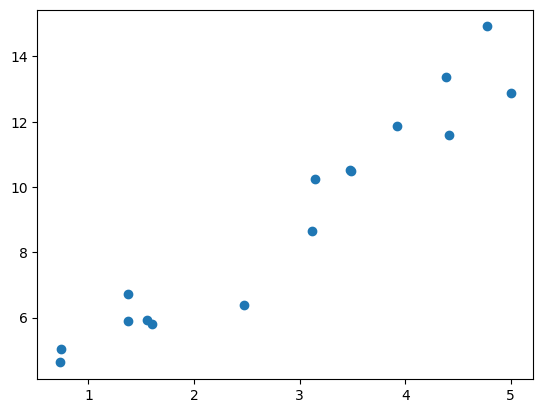

In [250]:
# 来看看产生的x-y分布
x, y = get_fake_data(batch_size=16)
plt.scatter(x.squeeze().cpu().numpy(), y.squeeze().cpu().numpy())


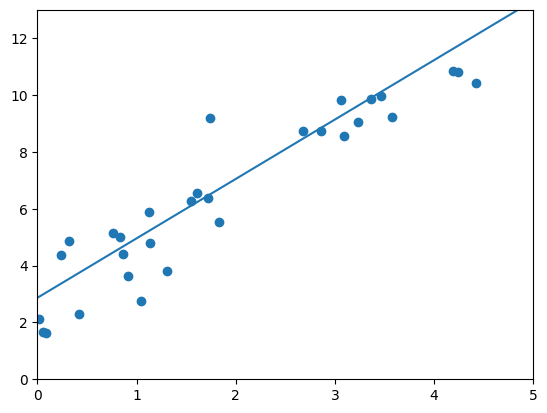

w:  2.1024889945983887 b:  2.9769670963287354


In [260]:
# 随机初始化参数
w = t.rand(1, 1).to(device)
b = t.zeros(1, 1).to(device)

lr = 0.02  # 学习率

for ii in range(500):
    x, y = get_fake_data(batch_size=4)

    # forward：计算loss
    y_pred = x.mm(w) + b.expand_as(y)  # x@W等价于x.mm(w);for python3 only
    loss = 0.5 * (y_pred - y) ** 2  # 均方误差
    loss = loss.mean()

    # backward：手动计算梯度
    dloss = 1
    dy_pred = dloss * (y_pred - y)

    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()

    # 更新参数
    w.sub_(lr * dw)
    b.sub_(lr * db)

    if ii % 50 == 0:
        # 画图
        display.clear_output(wait=True)
        x = t.arange(0, 6).view(-1, 1).to(device)
        y = x.float().mm(w) + b.expand_as(x)
        plt.plot(x.cpu().numpy(), y.cpu().numpy())  # predicted

        x2, y2 = get_fake_data(batch_size=32)
        plt.scatter(x2.cpu().numpy(), y2.cpu().numpy())  # true data

        plt.xlim(0, 5)
        plt.ylim(0, 13)
        plt.show()
        plt.pause(0.5)

print("w: ", w.item(), "b: ", b.item())


可见程序已经基本学出w=2、b=3，并且图中直线和数据已经实现较好的拟合。

虽然上面提到了许多操作，但是只要掌握了这个例子基本上就可以了，其他的知识，读者日后遇到的时候，可以再看看这部份的内容或者查找对应文档。
